In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data1="disdata.csv"
data= pd.read_csv(data1).dropna(axis = 1)
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
281,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
282,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Impetigo
283,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Impetigo


In [3]:
data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Disease                 0
Length: 113, dtype: int64

In [4]:
data.fillna(0,inplace=True)
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
281,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
282,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Impetigo
283,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Impetigo


In [5]:
data.shape

(285, 113)

In [6]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,0.140351,0.140351,0.014035,0.035088,0.014035,0.168421,0.154386,0.038596,0.045614,0.021053,...,0.014035,0.014035,0.014035,0.021053,0.021053,0.021053,0.021053,0.017544,0.017544,0.017544
std,0.347962,0.347962,0.117842,0.184325,0.117842,0.374898,0.361954,0.192970,0.209014,0.143812,...,0.117842,0.117842,0.117842,0.143812,0.143812,0.143812,0.143812,0.131517,0.131517,0.131517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.size

32205

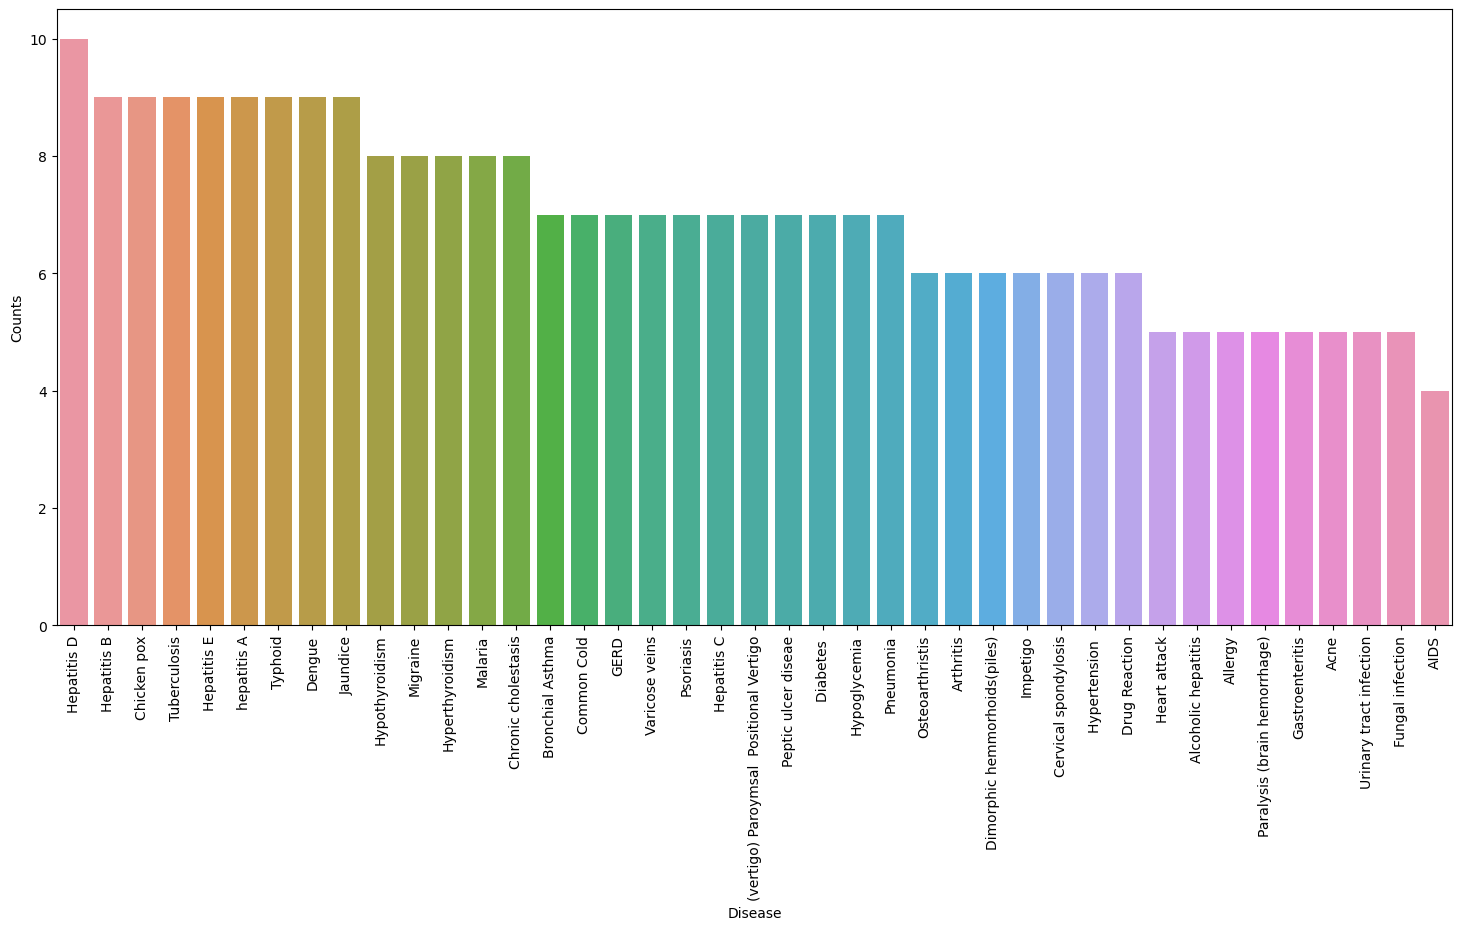

In [8]:
disease_counts = data["Disease"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [9]:
encoder = LabelEncoder()
data["Disease"] = encoder.fit_transform(data["Disease"])

In [10]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [11]:
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)

In [12]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))
 
# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
 
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, 
                             n_jobs = -1, 
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

C:\Users\Sadhana Shendge\anaconda3\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1.         1.         1.         1.         1.         1.
 1.         1.         0.96428571 0.96428571]
Mean Score: 0.9928571428571427


C:\Users\Sadhana Shendge\anaconda3\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Sadhana Shendge\anaconda3\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


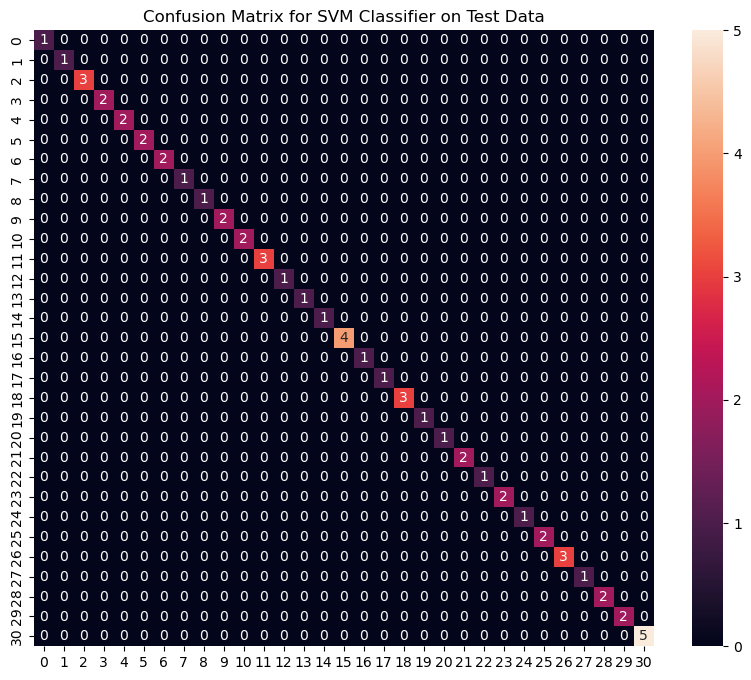

In [13]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)
 
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


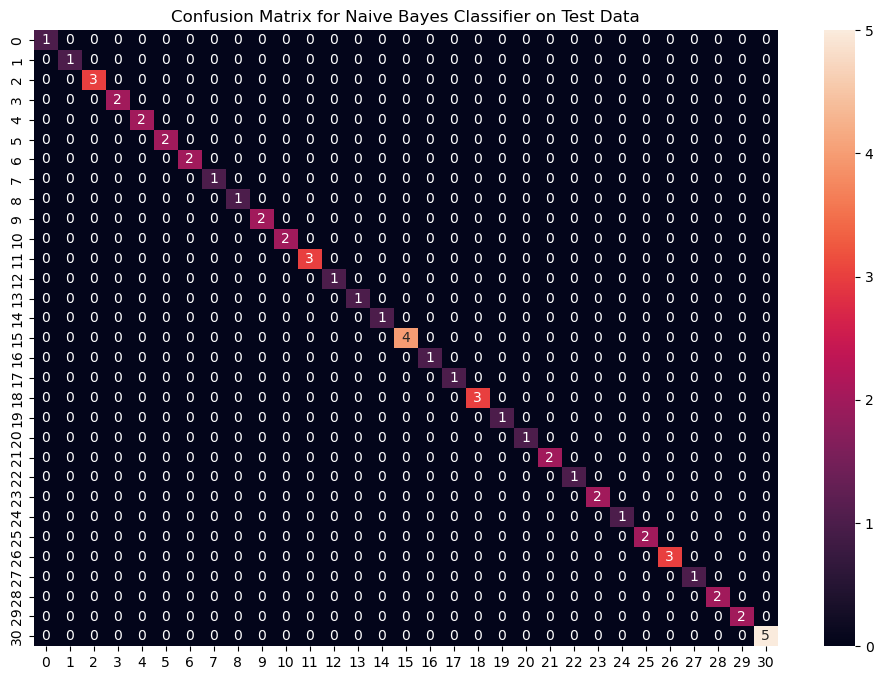

In [14]:
# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


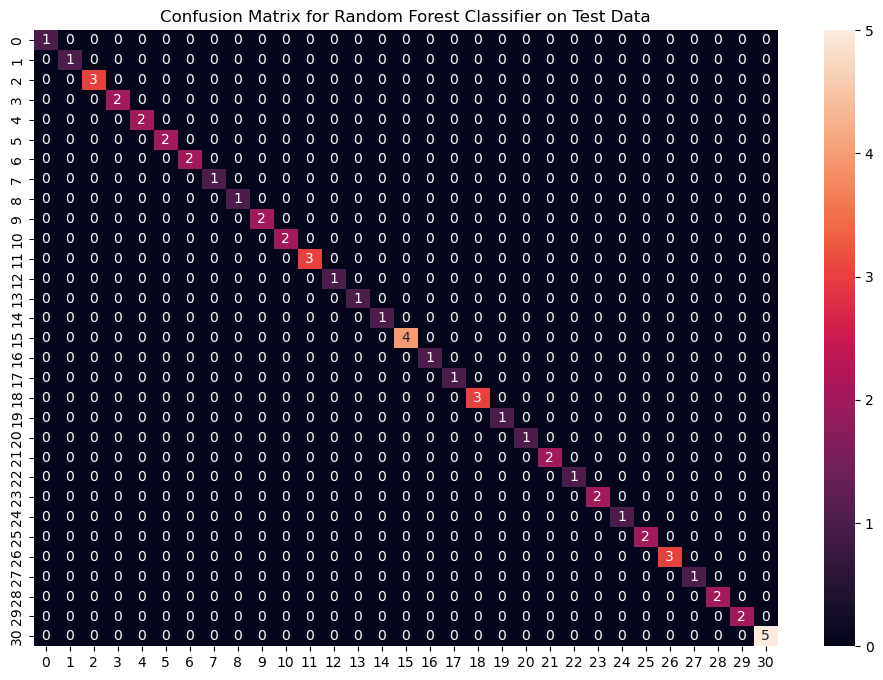

In [15]:
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")
 
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [16]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

RandomForestClassifier(random_state=18)

In [17]:
# Reading the test data
test_data = pd.read_csv("Testing1.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])


C:\Users\Sadhana Shendge\AppData\Local\Temp\ipykernel_16688\506631172.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_preds = [mode([i,j,k])[0][0] for i,j,


Accuracy on Test dataset by the combined model\: 97.61904761904762


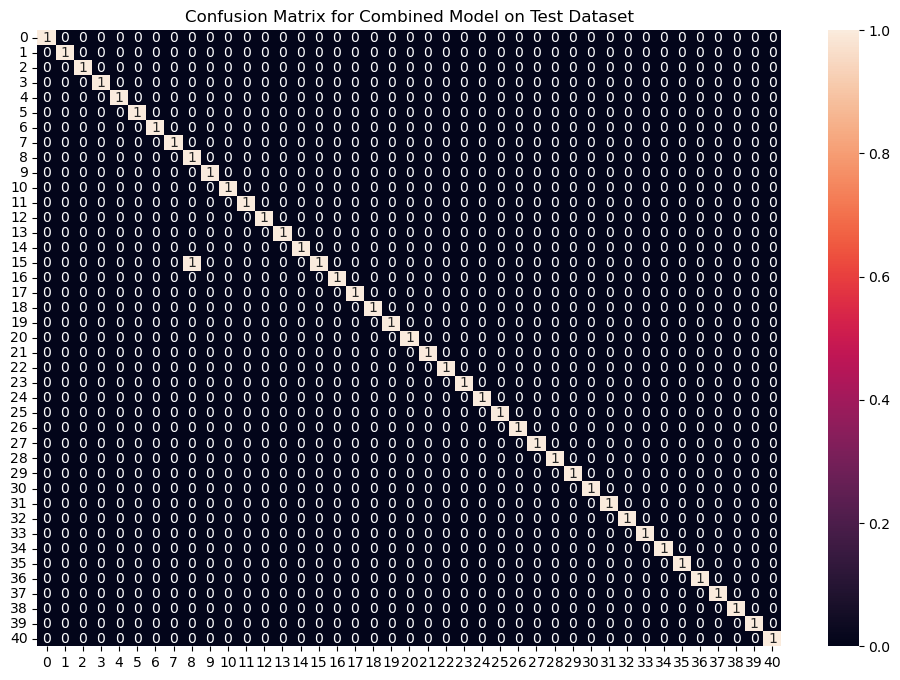

In [18]:
# Making prediction by take mode of predictions 
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [mode([i,j,k])[0][0] for i,j,
               k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model\: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier  
model = RandomForestClassifier()  
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('disdata.csv')

# Assuming your target column is named 'Target' and symptom columns have names 'Symptom1', 'Symptom2', etc.
X = data.drop('Disease',axis=1)
y = data['Disease']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train your model (you can use the model training code provided earlier)
model = RandomForestClassifier()
model.fit(X, y)

# Define a function to predict diseases based on user-selected symptoms
def predict_disease(selected_symptoms):
    selected_symptoms_encoded = [0] * len(X.columns)
    for symptom_number in selected_symptoms:
        selected_symptoms_encoded[symptom_number - 1] = 1
    predicted_label = model.predict([selected_symptoms_encoded])
    predicted_disease = label_encoder.inverse_transform(predicted_label)[0]
    return predicted_disease

# Create a simple command-line interface
while True:
    print("Available symptoms:")
    for i, symptom in enumerate(X.columns, start=1):
        print(f"{i}. {symptom}")

    selected_symptoms = input("Enter the symptom numbers (comma-separated): ").split(',')
    selected_symptoms = [int(symptom) for symptom in selected_symptoms]
    predicted_disease = predict_disease(selected_symptoms)
    print(f"Predicted disease: {predicted_disease}")

    another_prediction = input("Do you want to make another prediction? (yes/no): ")
    if another_prediction.lower() != 'yes':
        break


Available symptoms:
1. itching
2. skin_rash
3. nodal_skin_eruptions
4. continuous_sneezing
5. shivering
6. chills
7. joint_pain
8. stomach_pain
9. acidity
10. ulcers_on_tongue
11. muscle_wasting
12. vomiting
13. burning_micturition
14. spotting_ urination
15. fatigue
16. weight_gain
17. anxiety
18. cold_hands_and_feets
19. mood_swings
20. weight_loss
21. restlessness
22. lethargy
23. patches_in_throat
24. irregular_sugar_level
25. cough
26. high_fever
27. sunken_eyes
28. breathlessness
29. sweating
30. dehydration
31. indigestion
32. headache
33. yellowish_skin
34. dark_urine
35. nausea
36. loss_of_appetite
37. pain_behind_the_eyes
38. back_pain
39. constipation
40. abdominal_pain
41. diarrhoea
42. mild_fever
43. yellow_urine
44. yellowing_of_eyes
45. acute_liver_failure
46. fluid_overload
47. sinus_pressure
48. runny_nose
49. congestion
50. chest_pain
51. weakness_in_limbs
52. fast_heart_rate
53. pain_during_bowel_movements
54. pain_in_anal_region
55. bloody_stool
56. irritation_in_an

C:\Users\Sadhana Shendge\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted disease: Fungal infection
Do you want to make another prediction? (yes/no): no


# GUI

In [25]:
import tkinter as tk
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from tkinter import PhotoImage


# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('disdata.csv')

# Assuming your target column is named 'Target' and symptom columns have names 'Symptom1', 'Symptom2', etc.
X = data.drop('Disease', axis=1)
y = data['Disease']

# Create a dictionary to map numbers to symptoms
symptoms_dict = {i + 1: symptom for i, symptom in enumerate(X.columns)}

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train your model (you can use the model training code provided earlier)
model = RandomForestClassifier()
model.fit(X, y)

# Define a function to predict diseases based on user-selected symptoms
def predict_disease(selected_symptoms):
    selected_symptoms_encoded = [0] * len(X.columns)
    for symptom_number in selected_symptoms:
        selected_symptoms_encoded[symptom_number ] = 1
    predicted_label = model.predict([selected_symptoms_encoded])
    predicted_disease = label_encoder.inverse_transform(predicted_label)[0]
    return predicted_disease

# Create a function to handle the prediction
def predict_disease_gui():
    selected_symptoms = list(selected_symptoms_listbox.curselection())
    if not selected_symptoms:
        result_label.config(text="Please select symptoms.")
        return
    predicted_disease = predict_disease(selected_symptoms)
    result_label.config(text=f"Predicted disease: {predicted_disease}")

# Create a function to clear selected choices
def clear_choices():
    selected_symptoms_listbox.selection_clear(0, tk.END)

# Create a main application window
app = tk.Tk()
app.title("Disease Prediction")

# Create and configure GUI elements
instructions_label = tk.Label(app, text="Select multiple symptoms :",font=("Arial", 20))
instructions_label.pack()
instructions_label.place(x=190, y=100)  

# Create a Frame for the listbox
frame_left = tk.Frame(app)
frame_left.pack(side=tk.LEFT, padx=10, pady=10)

# Adjust the size (width, height) of the listbox
selected_symptoms_listbox = tk.Listbox(app, selectmode=tk.MULTIPLE, exportselection=10, width=60, height=20, font=("Arial", 16))

# Set the x and y coordinates to position the listbox within the app window
selected_symptoms_listbox.place(x=10, y=170)  # Adjust the x and y values as needed

# Insert items into the listbox
for i, symptom in symptoms_dict.items():
    selected_symptoms_listbox.insert(tk.END, f"{i}. {symptom}")


for i, symptom in symptoms_dict.items():
    selected_symptoms_listbox.insert(tk.END, f"{i}. {symptom}")
from tkinter import font
large_font = font.Font(family="Arial", size=16)

predict_button = tk.Button(app, text="Predict", command=predict_disease_gui, font=large_font)
predict_button.place(x=810, y=370, width=300, height=30)  # Adjust x, y, width, and height as needed

clear_button = tk.Button(app, text="Clear", command=clear_choices, font=large_font)
clear_button.place(x=1170, y=370, width=300, height=30)  # Adjust x, y, width, and height as needed

result_label = tk.Label(app, text="", font=large_font)
result_label.place(x=950, y=450, width=400, height=30)  # Adjust x, y, width, and height as needed


app.mainloop()
